In [1]:
%env NEPTUNE_API_TOKEN='eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI2MTRjNjcyYi0yYzNhLTQwN2UtYTliOS05MzVhN2FmZTBiNGUifQ=='

env: NEPTUNE_API_TOKEN='eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI2MTRjNjcyYi0yYzNhLTQwN2UtYTliOS05MzVhN2FmZTBiNGUifQ=='


In [2]:
import matplotlib.pyplot as plt
plt.rc('font', size=15)
import neptune.new as neptune

from gym_space.experiments.td3_visualisation import (
    load_ac, load_obs_buf, get_observations_space,
    q_on_const_action, q_on_policy
)

In [9]:
def imshow(arr, obs_space):
    # TODO: log y scale above max reward height
    # TODO: scatter observations
    min_pos, max_pos = obs_space[[0, -1], 0, 0]
    min_vel, max_vel = obs_space[0, [0, -1], 1]
    import torch
    with torch.no_grad():
        plt.imshow(
            arr,
            origin='lower',
            extent=(min_vel, max_vel, min_pos, max_pos),
            aspect='auto',
        )
    plt.colorbar()
    plt.xlabel("velocity")
    plt.ylabel("position")


In [10]:
def plot_v_pi(alg: str, run_nr: int):
    run = neptune.init(f'kajetan.janiak/hover1d-{alg}', run=f"H1{alg.upper()}-{run_nr}", mode="read-only")
    radius = run['env/params/planet_radius'].fetch()
    max_height = run['env/params/reward_max_height'].fetch()
    obs_buf = load_obs_buf(run)
    obs_space = get_observations_space(obs_buf)
    print(obs_space.shape)
    first = True
    for epoch in range(300, 401, 50):
    # for epoch in range(5, 101, 5):
        ac = load_ac(run, epoch)
        plt.figure(figsize=(10, 5))
        plt.subplot(121)
        # plt.title("value function")
        # imshow(on_policy_v(obs, ac), max_height)
        plt.title("Q full thrust")
        full_thrust_q = q_on_const_action(ac.q1, obs_space, action=1)
        imshow(full_thrust_q, obs_space)
        plt.subplot(122)
        # plt.title("policy")
        # imshow(pi_actions(obs, ac), max_height)
        plt.title("Q full - no thrust")
        imshow(full_thrust_q - q_on_const_action(ac.q1, obs_space, action=0), obs_space)
        if first:
            plt.suptitle(f"run {run_nr}\nepoch {epoch}")
            first = False
        else:
            plt.suptitle(f"epoch {epoch}")
        plt.tight_layout()

https://app.neptune.ai/kajetan.janiak/hover1d-td3/e/H1TD3-414
torch.Size([50, 50, 2])


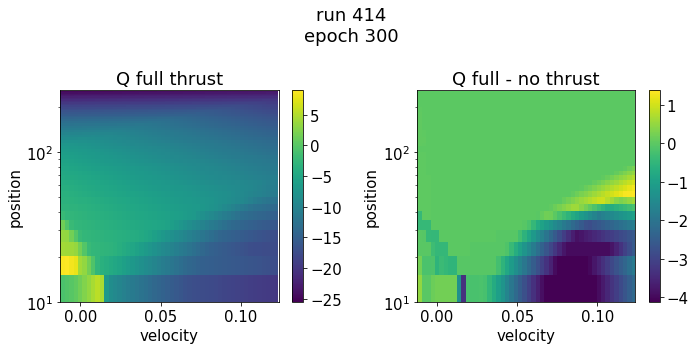

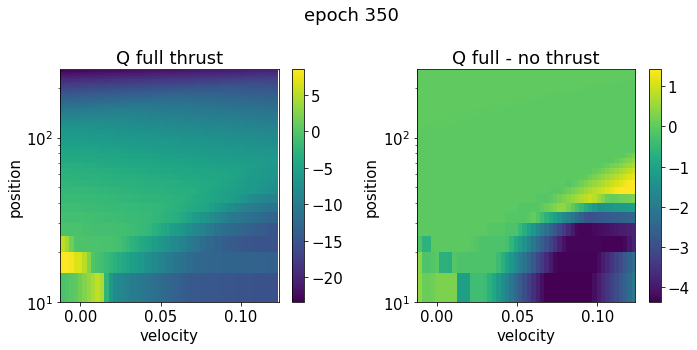

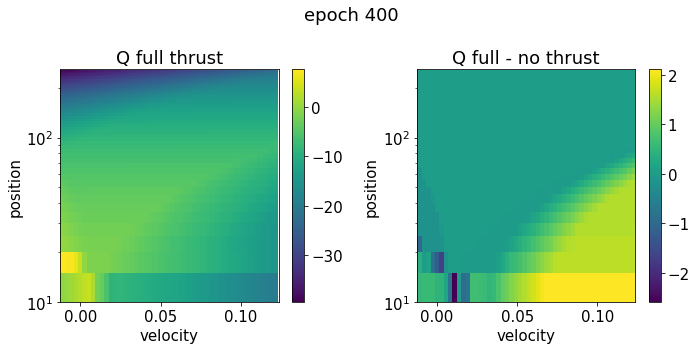

In [11]:
# for r_nr in [374, 377, 378, 383]:
plot_v_pi('td3', 414)
